In [3]:
import json
import requests
import pandas as pd
from k import api_key
import matplotlib.pyplot as plt
import csv
import numpy as np

In [7]:
cx = "0004244157511163772131:swmjc3vgy_a"
url = "https://www.googleapis.com/customsearch/v1?"

total_results = []
months = []
diff = []


for x in range(1, 13, 1):
    print(x)
    timeperiod1 = 'm' + str(x)
    parameters1 = {"q": "yodelling walmart boy",
              "cx": cx,
              "key": api_key,
              "dateRestrict": timeperiod1
              }
    timeperiod2 = 'm' + str(x+1)
    parameters2 = {"q": "yodelling walmart boy",
              "cx": cx,
              "key": api_key,
              "dateRestrict": timeperiod2
              }
    
    page1 = requests.request("GET", url, params=parameters1)
    page2 = requests.request("GET", url, params=parameters2)

    
    results1 = json.loads(page1.text)
    results2 = json.loads(page2.text)

    
    #print(results)
    hits1 = results1["searchInformation"]["totalResults"]
    hits1 = int(hits1)
    hits2 = results2["searchInformation"]["totalResults"]
    hits2 = int(hits2)

    
    #print(hits)
    hits = hits2 - hits1
    hits_permon = (hits2 - hits1) +hits1
    total_results.append(hits_permon)
    diff.append(hits)
    months.append("m" + str(x))

1
2
3
4
5
6
7
8
9
10
11
12


In [8]:
mon_df = pd.DataFrame({
    "Months": months,
    "Results": total_results
    })
mon_df

,Months,Results
0,m1,1680
1,m2,2520
2,m3,2540
3,m4,3020
4,m5,3490
5,m6,4030
6,m7,4260
7,m8,4810
8,m9,24000
9,m10,26900


<function matplotlib.pyplot.show(*args, **kw)>

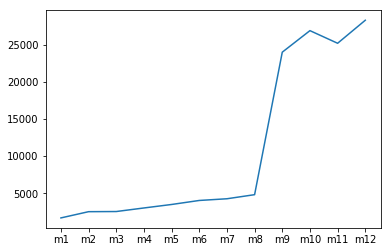

In [9]:
plt.plot(months, total_results)
plt.show